<a href="https://colab.research.google.com/github/tridibkrdey/Tridu-s-vault/blob/master/HeartDiseasePredicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the libraies

In [ ]:
# Regular tools for EDA and plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import all the scilit learn models which will be used in this roject
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import evaluation metrices

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score,f1_score,precision_score
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### If the libraries are not installing do the upgradation of the scikitlearn

In [ ]:
#conda upgrade scikit-learn

### Load The data of heart disease CSV 

In [ ]:
from google.colab import files
uploaded = files.upload()
#uploaded = files.upload()
#df = pd.read_csv("C:/Users/User/Desktop/zero-to-mastery-ml-master/data/heart-disease.csv")
#df=pd.read_csv("C:/Users/User/Desktop/zero-to-mastery-ml-master/data/heart-disease.csv")

Saving heart_disease.csv.csv to heart_disease.csv.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_disease.csv.csv']))

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Lets check out EDA of the  this data

### Check the Data imbalance of the final target column

In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# this is a balanced problem let's check it out with the bar plot

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

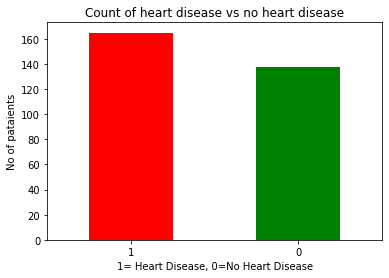

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Count of heart disease vs no heart disease")
plt.xlabel("1= Heart Disease, 0=No Heart Disease")
plt.ylabel("No of pataients")
plt.xticks(rotation=0)

### check out missing value if it's there?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe() # expoaratory stats about the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
corr=df.corr()

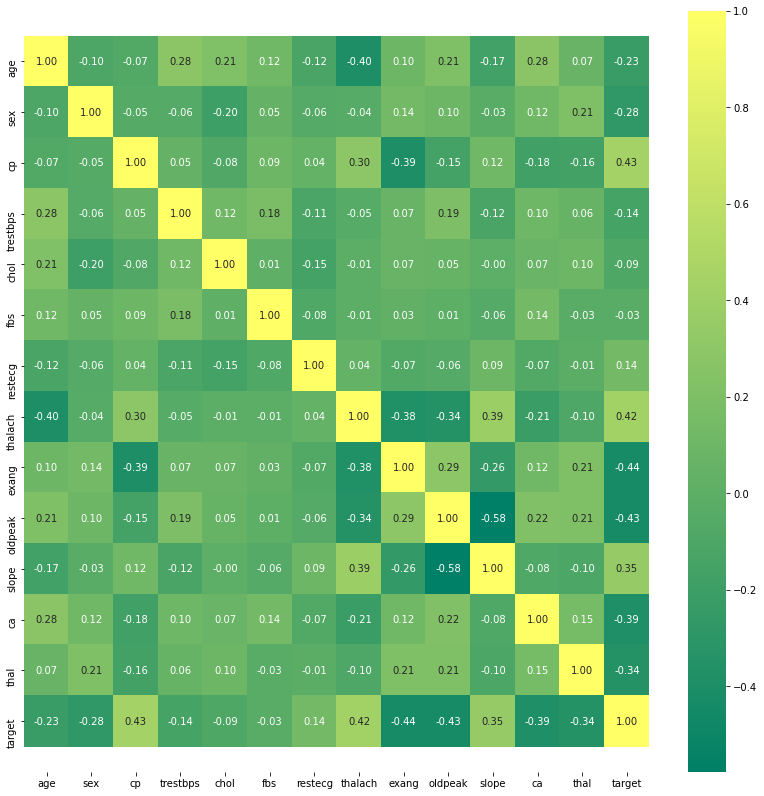

In [ ]:
fig, ax = plt.subplots(figsize=(14,14)) # set the fig size
sns.heatmap(corr, annot=True,fmt=".2f",cmap="summer")
ax.set_ylim(len(corr)+0.5, -0.5) # get rid of the cut off bug of heat map


plt.show();

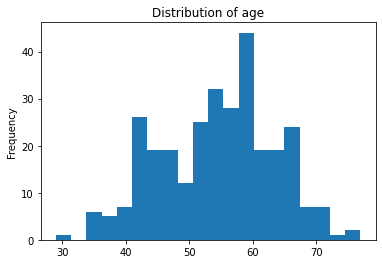

In [ ]:
#df.age.plot.hist()
df['age'].plot.hist(bins=20)
plt.title("Distribution of age");


## Lets create models

In [ ]:
# split the data into features(X) and Label(y)

X=df.drop(["target"], axis=1)
y=df["target"]

In [ ]:
#split the data into training set and testing set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Base Models

In [ ]:
# Lets make the model of Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg_score=logreg.score(X_test,y_test)
logreg_score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8852459016393442

In [ ]:
# lets make the model of K nearest Neighbors

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_score=knn.score(X_test,y_test)
knn_score

0.6885245901639344

In [ ]:
# Lets make the model of Random forest Classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf_score=clf.score(X_test,y_test)
clf_score

0.8360655737704918

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [ ]:
model_compare=pd.DataFrame([[logreg_score,knn_score,clf_score]],columns=['logreg_score','knn_score','clf_score'],index=["accuracy"])

In [ ]:
model_compare

,logreg_score,knn_score,clf_score
accuracy,0.885246,0.688525,0.836066


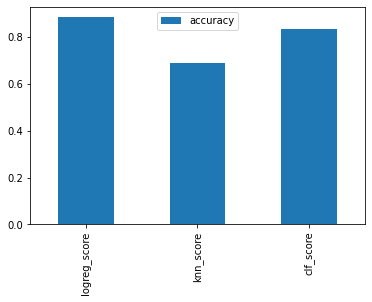

In [ ]:
model_compare.T.plot.bar();

## Hyperparameter Tuning through RandomizedSearchCV

In [ ]:
#Create Hyperparameter Grid with LogisticRegression

logreg_grid={"C":np.logspace(-4,4,20),
             "solver":['newton-cg', 'lbfgs', 'liblinear'],
             "penalty":['none', 'l1', 'l2', 'elasticnet']}

#Create Hyperparameter grid with knn

knn_grid={"n_neighbors":np.arange(30),
          "leaf_size":np.arange(50),
          "weights":['uniform', 'distance'],
          "metric" :['euclidean', 'manhattan', 'minkowski']}

#Create Hyperparameter grid with RandomForestClassifier

rf_grid={"n_estimators":np.arange(10,1000,100),
          "max_depth":[None,3,6,9],
          "min_samples_split":[2,4,6,8],
          #"min_samples_leaf":np.logspace(-1,1,20),
          "min_samples_leaf":np.arange(2, 20, 4),
          "max_leaf_nodes":[None,5,20,50,100,1000]}


In [ ]:
# Tune LogisticRegression on RandomizedSearchCV

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_logreg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=logreg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=2)


In [ ]:
rs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=newton-cg, penalty=none, C=0.0006951927961775605 .........
[CV]  solver=newton-cg, penalty=none, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.0006951927961775605 .........
[CV]  solver=newton-cg, penalty=none, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.0006951927961775605 .........
[CV]  solver=newton-cg, penalty=none, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.0006951927961775605 .........
[CV]  solver=newton-cg, penalty=none, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.0006951927961775605 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ign

[CV]  solver=newton-cg, penalty=none, C=0.0006951927961775605, total=   0.1s
[CV] solver=newton-cg, penalty=l2, C=0.0001 ..........................
[CV] ........... solver=newton-cg, penalty=l2, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=l2, C=0.0001 ..........................
[CV] ........... solver=newton-cg, penalty=l2, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=l2, C=0.0001 ..........................
[CV] ........... solver=newton-cg, penalty=l2, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=l2, C=0.0001 ..........................
[CV] ........... solver=newton-cg, penalty=l2, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=l2, C=0.0001 ..........................
[CV] ........... solver=newton-cg, penalty=l2, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.08858667904100823 .....
[CV]  solver=newton-cg, penalty=elasticnet, C=0.08858667904100823, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.08858667904100

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

[CV] .. solver=lbfgs, penalty=none, C=0.615848211066026, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=0.615848211066026 .................
[CV] .. solver=lbfgs, penalty=none, C=0.615848211066026, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=0.615848211066026 .................
[CV] .. solver=lbfgs, penalty=none, C=0.615848211066026, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.23357214690901212 .............
[CV]  solver=liblinear, penalty=l2, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.23357214690901212 .............
[CV]  solver=liblinear, penalty=l2, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.23357214690901212 .............
[CV]  solver=liblinear, penalty=l2, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.23357214690901212 .............
[CV]  solver=liblinear, penalty=l2, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.23357214690901212 ............

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C':...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                  

In [ ]:
rs_logreg_best_param=rs_logreg.best_params_
rs_logreg_best_param

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
rs_logreg_score=rs_logreg.score(X_test,y_test)
rs_logreg_score

0.8852459016393442

In [ ]:
#Tune knn on RandomizedSearchCV

np.random.seed(42)

rs_knn=RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_grid,
                            n_iter=100,
                            cv=5,
                            verbose=2)

In [ ]:
rs_knn.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44 .
[CV]  weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44, total=   0.0s
[CV] weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44 .
[CV]  weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44, total=   0.0s
[CV] weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44 .
[CV]  weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44, total=   0.0s
[CV] weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44 .
[CV]  weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44, total=   0.0s
[CV] weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44 .
[CV]  weights=uniform, n_neighbors=10, metric=euclidean, leaf_size=44, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=manhattan, leaf_size=6 ..
[CV]  weights=uniform, n_neighbors=11, metric=manhattan, leaf_size=6, total=   0.0s
[C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for 

[CV]  weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32, total=   0.0s
[CV] weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32 .
[CV]  weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32, total=   0.0s
[CV] weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32 .
[CV]  weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32, total=   0.0s
[CV] weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32 .
[CV]  weights=uniform, n_neighbors=28, metric=minkowski, leaf_size=32, total=   0.0s
[CV] weights=distance, n_neighbors=1, metric=euclidean, leaf_size=46 .
[CV]  weights=distance, n_neighbors=1, metric=euclidean, leaf_size=46, total=   0.0s
[CV] weights=distance, n_neighbors=1, metric=euclidean, leaf_size=46 .
[CV]  weights=distance, n_neighbors=1, metric=euclidean, leaf_size=46, total=   0.0s
[CV] weights=distance, n_neighbors=1, metric=euclidean, leaf_size=46 .
[CV]  weights=distance, n_neighbors=1, metric=euclidean, leaf_si

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: leaf_size must be greater than or equal to 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: leaf_size must be greater than or equal to 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: leaf_size must be greater than or equal to 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The 

[CV]  weights=distance, n_neighbors=13, metric=euclidean, leaf_size=4, total=   0.0s
[CV] weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3 ..
[CV]  weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3, total=   0.0s
[CV] weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3 ..
[CV]  weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3, total=   0.0s
[CV] weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3 ..
[CV]  weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3, total=   0.0s
[CV] weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3 ..
[CV]  weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3, total=   0.0s
[CV] weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3 ..
[CV]  weights=uniform, n_neighbors=20, metric=minkowski, leaf_size=3, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=minkowski, leaf_size=37 .
[CV]  weights=distance, n_neighbors=3, metric=minkowski, leaf_size=37

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: leaf_size must be greater than or equal to 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: leaf_size must be greater than or equal to 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: leaf_size must be greater than or equal to 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The 

[CV]  weights=uniform, n_neighbors=3, metric=minkowski, leaf_size=24, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=minkowski, leaf_size=24 ..
[CV]  weights=uniform, n_neighbors=3, metric=minkowski, leaf_size=24, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=minkowski, leaf_size=24 ..
[CV]  weights=uniform, n_neighbors=3, metric=minkowski, leaf_size=24, total=   0.0s
[CV] weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10 .
[CV]  weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10, total=   0.0s
[CV] weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10 .
[CV]  weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10, total=   0.0s
[CV] weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10 .
[CV]  weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10, total=   0.0s
[CV] weights=distance, n_neighbors=8, metric=manhattan, leaf_size=10 .
[CV]  weights=distance, n_neighbors=8, metric=manhattan, leaf_size=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for 

[CV]  weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43 .
[CV]  weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43 .
[CV]  weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43 .
[CV]  weights=uniform, n_neighbors=19, metric=minkowski, leaf_size=43, total=   0.0s
[CV] weights=uniform, n_neighbors=24, metric=manhattan, leaf_size=11 .
[CV]  weights=uniform, n_neighbors=24, metric=manhattan, leaf_size=11, total=   0.0s
[CV] weights=uniform, n_neighbors=24, metric=manhattan, leaf_size=11 .
[CV]  weights=uniform, n_neighbors=24, metric=manhattan, leaf_size=11, total=   0.0s
[CV] weights=uniform, n_neighbors=24, metric=manhattan, leaf_size=11 .
[CV]  weights=uniform, n_neighbors=24, metric=manhattan, leaf_si

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors'

In [ ]:
rs_knn_best_param=rs_knn.best_params_
rs_logreg_best_param

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
rs_knn_score=rs_knn.score(X_test,y_test)
rs_knn_score

0.7540983606557377

In [ ]:
%%time
# Tune RandomForestClassifier with RandomizedSearchCV
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         n_iter=100,
                         cv=5,
                         verbose=0)

In [ ]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6, total=   1.0s
[CV] n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6, total=   1.0s
[CV] n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6 
[CV]  n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6, total=   1.0s
[CV] n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6 
[CV]  n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6, total=   1.0s
[CV] n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6 
[CV]  n_estimators=760, min_samples_split=4, min_samples_leaf=18, max_leaf_nodes=50, max_depth=6, total=   1.0s
[CV] n_estimators=10, min_samples_split=8, min_samples_leaf=4, max_leaf_nodes=5, max_depth=None 
[CV]  n_estimators=10, min_samples_split=8, min_samples_leaf=4, max_leaf_nodes=5, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=8, min_sampl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rf_best_param=rs_rf.best_params_
rs_rf_best_param

{'max_depth': 3,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 610}

In [ ]:
rs_rf_score=rs_rf.score(X_test,y_test)
rs_rf_score

0.8688524590163934

## Hyperparameter tuning through GridSearchedCV

In [ ]:
%%time
# Tune LogisticRegression on GidSearchCV

np.random.seed(42)


# Setup random hyperparameter search for LogisticRegression
gs_logreg = GridSearchCV(LogisticRegression(),
                                param_grid=logreg_grid,
                                cv=5,
                                
                                verbose=0)

#fit the Logistic Regression model with gridsearchCV
gs_logreg.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] C=0.0001, penalty=none, solver=newton-cg ........................
[CV] ......... C=0.0001, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0001, penalty=none, solver=newton-cg ........................
[CV] ......... C=0.0001, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0001, penalty=none, solver=newton-cg ........................
[CV] ......... C=0.0001, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0001, penalty=none, solver=newton-cg ........................
[CV] ......... C=0.0001, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0001, penalty=none, solver=newton-cg ........................
[CV] ......... C=0.0001, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0001, penalty=none, solver=lbfgs ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ign

[CV] ............. C=0.0001, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=none, solver=lbfgs ............................
[CV] ............. C=0.0001, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=none, solver=lbfgs ............................
[CV] ............. C=0.0001, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=none, solver=lbfgs ............................
[CV] ............. C=0.0001, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=none, solver=lbfgs ............................
[CV] ............. C=0.0001, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0001, penalty=none, solver=liblinear ........................
[CV] ......... C=0.0001, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=none, solver=liblinear ........................
[CV] ......... C=0.0001, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=none, solver=liblinear ........................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-pack

[CV]  C=0.00026366508987303583, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=newton-cg ........
[CV]  C=0.00026366508987303583, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=newton-cg ........
[CV]  C=0.00026366508987303583, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=newton-cg ........
[CV]  C=0.00026366508987303583, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=lbfgs ............
[CV]  C=0.00026366508987303583, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=lbfgs ............
[CV]  C=0.00026366508987303583, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=lbfgs ............
[CV]  C=0.00026366508987303583, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.00026366508987303583, penalty=n

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sk

[CV]  C=0.00026366508987303583, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=lbfgs ............
[CV]  C=0.00026366508987303583, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=liblinear ........
[CV]  C=0.00026366508987303583, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=liblinear ........
[CV]  C=0.00026366508987303583, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=liblinear ........
[CV]  C=0.00026366508987303583, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=liblinear ........
[CV]  C=0.00026366508987303583, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, penalty=none, solver=liblinear ........
[CV]  C=0.00026366508987303583, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, penal

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-pack

[CV]  C=0.0006951927961775605, penalty=none, solver=newton-cg, total=   0.1s
[CV] C=0.0006951927961775605, penalty=none, solver=lbfgs .............
[CV]  C=0.0006951927961775605, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=none, solver=lbfgs .............
[CV]  C=0.0006951927961775605, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=none, solver=lbfgs .............
[CV]  C=0.0006951927961775605, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=none, solver=lbfgs .............
[CV]  C=0.0006951927961775605, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=none, solver=lbfgs .............
[CV]  C=0.0006951927961775605, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=none, solver=liblinear .........
[CV]  C=0.0006951927961775605, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=none, solver=libl

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sk

[CV]  C=0.0006951927961775605, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l1, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l1, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l1, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train

[CV]  C=0.0006951927961775605, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=lbfgs ...............
[CV]  C=0.0006951927961775605, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=l2, solver=liblinear ...........
[CV]  C=0.0006951927961775605, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, penalty=elasticnet, solver=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=0.0018329807108324356, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=newton-cg .........
[CV]  C=0.0018329807108324356, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=lbfgs .............
[CV]  C=0.0018329807108324356, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=lbfgs .............
[CV]  C=0.0018329807108324356, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=lbfgs .............
[CV]  C=0.0018329807108324356, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=lbfgs .............
[CV]  C=0.0018329807108324356, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=lbfgs .............
[CV]  C=0.0018329807108324356, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=none, solver=libl

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=0.0018329807108324356, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l1, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l1, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l1, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l1, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=0.0018329807108324356, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=lbfgs ...............
[CV]  C=0.0018329807108324356, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=l2, solver=liblinear ...........
[CV]  C=0.0018329807108324356, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0018329807108324356, penalty=elasticnet, solver=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=0.004832930238571752, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=newton-cg ..........
[CV]  C=0.004832930238571752, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=lbfgs ..............
[CV]  C=0.004832930238571752, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=lbfgs ..............
[CV]  C=0.004832930238571752, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=lbfgs ..............
[CV]  C=0.004832930238571752, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=lbfgs ..............
[CV]  C=0.004832930238571752, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=lbfgs ..............
[CV]  C=0.004832930238571752, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=none, solver=liblinear ..

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=0.004832930238571752, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l1, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l1, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l1, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l1, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=newton-cg ............
[CV]  C=0.004832930238571752, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=newton-cg ............
[CV]  C=0.004832930238571752, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=newton-c

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] . C=0.004832930238571752, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=lbfgs ................
[CV] . C=0.004832930238571752, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=l2, solver=liblinear ............
[CV]  C=0.004832930238571752, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.004832930238571752, penalty=elasticnet, solver=newton

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=0.012742749857031334, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=newton-cg ..........
[CV]  C=0.012742749857031334, penalty=none, solver=newton-cg, total=   0.1s
[CV] C=0.012742749857031334, penalty=none, solver=newton-cg ..........
[CV]  C=0.012742749857031334, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=lbfgs ..............
[CV]  C=0.012742749857031334, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=lbfgs ..............
[CV]  C=0.012742749857031334, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=lbfgs ..............
[CV]  C=0.012742749857031334, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=lbfgs ..............


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=0.012742749857031334, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=lbfgs ..............
[CV]  C=0.012742749857031334, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=liblinear ..........
[CV]  C=0.012742749857031334, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=liblinear ..........
[CV]  C=0.012742749857031334, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=liblinear ..........
[CV]  C=0.012742749857031334, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=liblinear ..........
[CV]  C=0.012742749857031334, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=none, solver=liblinear ..........
[CV]  C=0.012742749857031334, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=l1, solver=ne

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] . C=0.012742749857031334, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=lbfgs ................
[CV] . C=0.012742749857031334, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=lbfgs ................
[CV] . C=0.012742749857031334, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=lbfgs ................
[CV] . C=0.012742749857031334, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=liblinear ............
[CV]  C=0.012742749857031334, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=liblinear ............
[CV]  C=0.012742749857031334, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=liblinear ............
[CV]  C=0.012742749857031334, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=liblinear ..........

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV] C=0.03359818286283781, penalty=none, solver=newton-cg ...........
[CV]  C=0.03359818286283781, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=newton-cg ...........
[CV]  C=0.03359818286283781, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=newton-cg ...........
[CV]  C=0.03359818286283781, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=lbfgs ...............
[CV]  C=0.03359818286283781, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=lbfgs ...............
[CV]  C=0.03359818286283781, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=lbfgs ...............


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=0.03359818286283781, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=lbfgs ...............
[CV]  C=0.03359818286283781, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=lbfgs ...............
[CV]  C=0.03359818286283781, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=liblinear ...........
[CV]  C=0.03359818286283781, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=liblinear ...........
[CV]  C=0.03359818286283781, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=liblinear ...........
[CV]  C=0.03359818286283781, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=liblinear ...........
[CV]  C=0.03359818286283781, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, penalty=none, solver=liblinear ..

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] .. C=0.03359818286283781, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=lbfgs .................
[CV] .. C=0.03359818286283781, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=lbfgs .................
[CV] .. C=0.03359818286283781, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=lbfgs .................
[CV] .. C=0.03359818286283781, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=lbfgs .................
[CV] .. C=0.03359818286283781, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=0.08858667904100823, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=none, solver=lbfgs ...............
[CV]  C=0.08858667904100823, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=none, solver=liblinear ...........
[CV]  C=0.08858667904100823, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=none, solver=liblinear ...........
[CV]  C=0.08858667904100823, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=none, solver=liblinear ...........
[CV]  C=0.08858667904100823, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=none, solver=liblinear ...........
[CV]  C=0.08858667904100823, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=none, solver=liblinear ...........
[CV]  C=0.08858667904100823, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=newton-cg 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] .. C=0.08858667904100823, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=lbfgs .................
[CV] .. C=0.08858667904100823, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=lbfgs .................
[CV] .. C=0.08858667904100823, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=lbfgs .................
[CV] .. C=0.08858667904100823, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=lbfgs .................
[CV] .. C=0.08858667904100823, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio

[CV]  C=0.23357214690901212, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=lbfgs ...............
[CV]  C=0.23357214690901212, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=lbfgs ...............
[CV]  C=0.23357214690901212, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=lbfgs ...............
[CV]  C=0.23357214690901212, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=lbfgs ...............
[CV]  C=0.23357214690901212, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=liblinear ...........
[CV]  C=0.23357214690901212, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=liblinear ...........
[CV]  C=0.23357214690901212, penalty=none, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=none, solver=liblinear ..........

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] .. C=0.23357214690901212, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.23357214690901212, penalty=elasticnet, solver=newton-cg .....
[CV]  C=0.23357214690901212, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=0.23357214690901212, penalty=elasticnet, solver=ne

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=0.615848211066026, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=newton-cg .............
[CV]  C=0.615848211066026, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=lbfgs .................
[CV] .. C=0.615848211066026, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=lbfgs .................
[CV] .. C=0.615848211066026, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=lbfgs .................
[CV] .. C=0.615848211066026, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=lbfgs .................
[CV] .. C=0.615848211066026, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=lbfgs .................
[CV] .. C=0.615848211066026, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=none, solver=liblinear .............
[C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:



[CV] C=0.615848211066026, penalty=l1, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, total=   0.0s
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] .... C=0.615848211066026, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=lbfgs ...................
[CV] .... C=0.615848211066026, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV] .. C=1.623776739188721, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=lbfgs .................
[CV] .. C=1.623776739188721, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=lbfgs .................
[CV] .. C=1.623776739188721, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=lbfgs .................
[CV] .. C=1.623776739188721, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=liblinear .............
[CV]  C=1.623776739188721, penalty=none, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=liblinear .............
[CV]  C=1.623776739188721, penalty=none, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=liblinear .............
[CV]  C=1.623776739188721, penalty=none, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=none, solver=liblinear .............


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] .... C=1.623776739188721, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=lbfgs ...................
[CV] .... C=1.623776739188721, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=lbfgs ...................
[CV] .... C=1.623776739188721, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=4.281332398719396, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=newton-cg .............
[CV]  C=4.281332398719396, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=newton-cg .............
[CV]  C=4.281332398719396, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=lbfgs .................
[CV] .. C=4.281332398719396, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=lbfgs .................
[CV] .. C=4.281332398719396, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=lbfgs .................
[CV] .. C=4.281332398719396, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=lbfgs .................
[CV] .. C=4.281332398719396, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=lbfgs .................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] .. C=4.281332398719396, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=liblinear .............
[CV]  C=4.281332398719396, penalty=none, solver=liblinear, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=liblinear .............
[CV]  C=4.281332398719396, penalty=none, solver=liblinear, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=liblinear .............
[CV]  C=4.281332398719396, penalty=none, solver=liblinear, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=liblinear .............
[CV]  C=4.281332398719396, penalty=none, solver=liblinear, total=   0.0s
[CV] C=4.281332398719396, penalty=none, solver=liblinear .............
[CV]  C=4.281332398719396, penalty=none, solver=liblinear, total=   0.0s
[CV] C=4.281332398719396, penalty=l1, solver=newton-cg ...............
[CV]  C=4.281332398719396, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.281332398719396, penalty=l1, solver=newton-cg ............

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=11.288378916846883, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=newton-cg ............
[CV]  C=11.288378916846883, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=newton-cg ............
[CV]  C=11.288378916846883, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=newton-cg ............
[CV]  C=11.288378916846883, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=newton-cg ............
[CV]  C=11.288378916846883, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=lbfgs ................
[CV] . C=11.288378916846883, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=lbfgs ................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV] . C=11.288378916846883, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=lbfgs ................
[CV] . C=11.288378916846883, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=lbfgs ................
[CV] . C=11.288378916846883, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=lbfgs ................
[CV] . C=11.288378916846883, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=liblinear ............
[CV]  C=11.288378916846883, penalty=none, solver=liblinear, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=liblinear ............
[CV]  C=11.288378916846883, penalty=none, solver=liblinear, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=liblinear ............
[CV]  C=11.288378916846883, penalty=none, solver=liblinear, total=   0.0s
[CV] C=11.288378916846883, penalty=none, solver=liblinear ..........

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=11.288378916846883, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=newton-cg ..............
[CV]  C=11.288378916846883, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=newton-cg ..............
[CV]  C=11.288378916846883, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=newton-cg ..............
[CV]  C=11.288378916846883, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=newton-cg ..............
[CV]  C=11.288378916846883, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=lbfgs ..................
[CV] ... C=11.288378916846883, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=lbfgs ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ... C=11.288378916846883, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=lbfgs ..................
[CV] ... C=11.288378916846883, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=lbfgs ..................
[CV] ... C=11.288378916846883, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=lbfgs ..................
[CV] ... C=11.288378916846883, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  C=29.763514416313132, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=newton-cg ............
[CV]  C=29.763514416313132, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=newton-cg ............
[CV]  C=29.763514416313132, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=lbfgs ................
[CV] . C=29.763514416313132, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=lbfgs ................
[CV] . C=29.763514416313132, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=lbfgs ................
[CV] . C=29.763514416313132, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=lbfgs ................
[CV] . C=29.763514416313132, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=lbfgs ..............

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] . C=29.763514416313132, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=liblinear ............
[CV]  C=29.763514416313132, penalty=none, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=liblinear ............
[CV]  C=29.763514416313132, penalty=none, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=liblinear ............
[CV]  C=29.763514416313132, penalty=none, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=liblinear ............
[CV]  C=29.763514416313132, penalty=none, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=none, solver=liblinear ............
[CV]  C=29.763514416313132, penalty=none, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=newton-cg ..............
[CV]  C=29.763514416313132, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=newton-cg .....

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ... C=29.763514416313132, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=elasticnet, solver=newton-cg ......
[CV]  C=29.763514416313132, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=29.763514416313132, penalty=elasticnet, solver=newton-cg

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  C=78.47599703514607, penalty=none, solver=newton-cg, total=   0.1s
[CV] C=78.47599703514607, penalty=none, solver=lbfgs .................
[CV] .. C=78.47599703514607, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=78.47599703514607, penalty=none, solver=lbfgs .................
[CV] .. C=78.47599703514607, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=78.47599703514607, penalty=none, solver=lbfgs .................
[CV] .. C=78.47599703514607, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=78.47599703514607, penalty=none, solver=lbfgs .................
[CV] .. C=78.47599703514607, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=78.47599703514607, penalty=none, solver=lbfgs .................
[CV] .. C=78.47599703514607, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=78.47599703514607, penalty=none, solver=liblinear .............
[CV]  C=78.47599703514607, penalty=none, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=none, solver=liblinear .............
[C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=newton-cg ...............
[CV]  C=78.47599703514607, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=newton-cg ...............
[CV]  C=78.47599703514607, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=newton-cg ...............
[CV]  C=78.47599703514607, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=newton-cg ...............
[CV]  C=78.47599703514607, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=newton-cg ...............
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=206.913808111479, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=newton-cg ..............
[CV]  C=206.913808111479, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=newton-cg ..............
[CV]  C=206.913808111479, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=newton-cg ..............
[CV]  C=206.913808111479, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=newton-cg ..............
[CV]  C=206.913808111479, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=lbfgs ..................
[CV] ... C=206.913808111479, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=lbfgs ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV] ... C=206.913808111479, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=lbfgs ..................
[CV] ... C=206.913808111479, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=lbfgs ..................
[CV] ... C=206.913808111479, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=lbfgs ..................
[CV] ... C=206.913808111479, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=liblinear ..............
[CV]  C=206.913808111479, penalty=none, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=liblinear ..............
[CV]  C=206.913808111479, penalty=none, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=liblinear ..............
[CV]  C=206.913808111479, penalty=none, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, penalty=none, solver=liblinear ..............
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] . C=206.913808111479, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=newton-cg ................
[CV] . C=206.913808111479, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=newton-cg ................
[CV] . C=206.913808111479, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=newton-cg ................
[CV] . C=206.913808111479, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=newton-cg ................
[CV] . C=206.913808111479, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=lbfgs ....................
[CV] ..... C=206.913808111479, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=lbfgs ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ..... C=206.913808111479, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=lbfgs ....................
[CV] ..... C=206.913808111479, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=lbfgs ....................
[CV] ..... C=206.913808111479, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=lbfgs ....................
[CV] ..... C=206.913808111479, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV] . C=206.913808111479, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV] . C=206.913808111479, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV] . C=206.913808111479, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  C=545.5594781168514, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=newton-cg .............
[CV]  C=545.5594781168514, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=newton-cg .............
[CV]  C=545.5594781168514, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=lbfgs .................
[CV] .. C=545.5594781168514, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=lbfgs .................
[CV] .. C=545.5594781168514, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=lbfgs .................
[CV] .. C=545.5594781168514, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=lbfgs .................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] .. C=545.5594781168514, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=lbfgs .................
[CV] .. C=545.5594781168514, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=liblinear .............
[CV]  C=545.5594781168514, penalty=none, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=liblinear .............
[CV]  C=545.5594781168514, penalty=none, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=liblinear .............
[CV]  C=545.5594781168514, penalty=none, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=liblinear .............
[CV]  C=545.5594781168514, penalty=none, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=none, solver=liblinear .............
[CV]  C=545.5594781168514, penalty=none, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=l1, solver=newton-cg ............

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=l2, solver=liblinear ...............
[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=545.5594781168514, penalty=elasticnet, solver=newton-cg .......
[CV]  C=545.5594781168514, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=elasticnet, solver=newton-cg .......
[CV]  C=545.5594781168514, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=elasticnet, solver=newton-cg .......
[CV]  C=545.5594781168514, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=elasticnet, solver=newton-cg .......
[CV]  C=545.5594781168514, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=elasticnet, solver=newton-cg .......
[CV]  C=545.5594781168514, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=545.5594781168514, penalty=ela

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  C=1438.44988828766, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=lbfgs ..................
[CV] ... C=1438.44988828766, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=lbfgs ..................
[CV] ... C=1438.44988828766, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=lbfgs ..................
[CV] ... C=1438.44988828766, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=lbfgs ..................
[CV] ... C=1438.44988828766, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=lbfgs ..................
[CV] ... C=1438.44988828766, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=liblinear ..............
[CV]  C=1438.44988828766, penalty=none, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=none, solver=liblinear ..............
[CV]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] . C=1438.44988828766, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=newton-cg ................
[CV] . C=1438.44988828766, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=newton-cg ................
[CV] . C=1438.44988828766, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=newton-cg ................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] . C=1438.44988828766, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV] . C=1438.44988828766, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1438.44988828766, penalty=elasticnet, solver=newton-cg ........
[CV]  C=1438.44988828766, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=1438.44988828766, penalty=elasticnet, solver=newton-cg ........
[CV]  C=1438.44988828766, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=1438.44988828766, penalty=elasticnet, solver=newton-cg ........
[CV]  C=1438.44988828766, penalty=elasticnet, solver=newton-cg, total=   0.0s
[CV] C=1438.44988828766, penalty=elasticnet, solver=newt

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  C=3792.690190732246, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=newton-cg .............
[CV]  C=3792.690190732246, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=lbfgs .................
[CV] .. C=3792.690190732246, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=lbfgs .................
[CV] .. C=3792.690190732246, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=lbfgs .................
[CV] .. C=3792.690190732246, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=lbfgs .................
[CV] .. C=3792.690190732246, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=lbfgs .................
[CV] .. C=3792.690190732246, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=liblinear .............
[C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] C=3792.690190732246, penalty=none, solver=liblinear .............
[CV]  C=3792.690190732246, penalty=none, solver=liblinear, total=   0.0s
[CV] C=3792.690190732246, penalty=none, solver=liblinear .............
[CV]  C=3792.690190732246, penalty=none, solver=liblinear, total=   0.0s
[CV] C=3792.690190732246, penalty=l1, solver=newton-cg ...............
[CV]  C=3792.690190732246, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, penalty=l1, solver=newton-cg ...............
[CV]  C=3792.690190732246, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, penalty=l1, solver=newton-cg ...............
[CV]  C=3792.690190732246, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, penalty=l1, solver=newton-cg ...............
[CV]  C=3792.690190732246, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, penalty=l1, solver=newton-cg ...............
[CV]  C=3792.690190732246, penalty=l1, solver=newton-cg, total=   0.0s
[C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] C=3792.690190732246, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=3792.690190732246, penalty=elasticnet, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, penalty=elasticnet, solver=liblinear .......
[CV]  C=3792.690190732246, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] C=3792.690190732246, penalty=elasticnet, solver=liblinear .......
[CV]  C=3792.690190732246, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] C=3792.690190732246, penalty=elasticnet, solver=liblinear .......
[CV]  C=3792.690190732246, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] C=3792.690190732246, penalty=elasticnet, solver=liblinear .......
[CV]  C=3792.690190732246, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] C=3792.690190732246, penalty=elasticnet, solver=liblinear .......
[CV]  C=3792.690190732246, penalty=elasticnet, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=none, solver=newton-cg .......................
[CV] ........ C=10000.0, penalty=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV] ............ C=10000.0, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10000.0, penalty=none, solver=lbfgs ...........................
[CV] ............ C=10000.0, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10000.0, penalty=none, solver=lbfgs ...........................
[CV] ............ C=10000.0, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10000.0, penalty=none, solver=lbfgs ...........................
[CV] ............ C=10000.0, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10000.0, penalty=none, solver=lbfgs ...........................
[CV] ............ C=10000.0, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10000.0, penalty=none, solver=liblinear .......................
[CV] ........ C=10000.0, penalty=none, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=none, solver=liblinear .......................
[CV] ........ C=10000.0, penalty=none, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=none, solver=liblinear .......................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV] .......... C=10000.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=newton-cg .........................
[CV] .......... C=10000.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=newton-cg .........................
[CV] .......... C=10000.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=newton-cg .........................
[CV] .......... C=10000.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=newton-cg .........................
[CV] .......... C=10000.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=newton-cg .........................
[CV] .......... C=10000.0, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=10000.0, penalty=l2, solver=lbfgs .............................
[CV] .............. C=10000.0, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=lbfgs .............................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
     

In [ ]:
gs_log_reg_best_param=gs_logreg.best_params_
gs_log_reg_best_param

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
gs_log_reg_score=gs_logreg.score(X_test,y_test)
gs_log_reg_score

0.8852459016393442

In [ ]:
%%time
# Tune knn with gridSearch

np.random.seed(42)

gs_knn=GridSearchCV(KNeighborsClassifier(),
                   param_grid=knn_grid,
                   cv=5,
                   verbose=0)

#Fit knn into gridSearch

gs_knn.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mod

CPU times: user 3min 40s, sys: 1.01 s, total: 3min 41s
Wall time: 3min 41s


In [ ]:
gs_knn_best_param=gs_knn.best_params_
gs_knn_best_param

{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'distance'}

In [ ]:
gs_knn_score=gs_knn.score(X_test,y_test)
gs_knn_score

NameError: ignored

In [ ]:
#Tune GridSearchCVSearchCVndom Forest with GridSearchCV
gs_rf=GridSearchCV(RandomForestClassifier(),
                  param_grid=rf_grid,
                  cv=5,
                  verbose=0)





In [ ]:
%%time
#Fit the model Grid Search

gs_rf.fit(X_train,y_train)

CPU times: user 4h 6min 40s, sys: 59.8 s, total: 4h 7min 40s
Wall time: 4h 7min 58s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
gs_rf_bestparam=gs_rf.best_params_

NameError: ignored

In [ ]:
gs_rf.score(X_test,y_test)

NameError: ignored